# COMP3211 Assigment2 - Image Segmentation using K-Means

## Problem 1: K-means based Unsupservised Segmentation

### Importing the libraries and papreprocessing the data

(330, 500, 3)


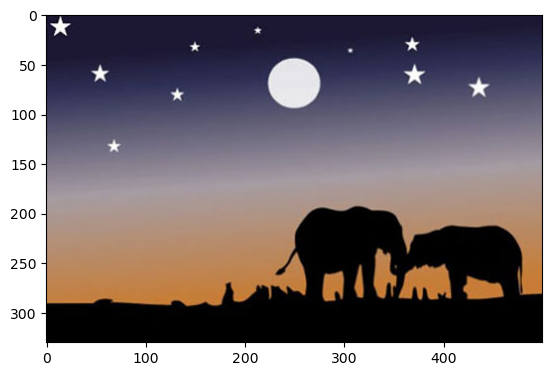

(165000, 3)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape

print(im.shape)
plt.imshow(im) # as RGB Format
plt.show()

# Flatten Each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

### Q1. Implement your K-Means Clustering

In [26]:
def k_means_algorithm(n_clusters: int, all_pixels: np.ndarray):
    """
    Applies K-Means clustering on the provided pixel data to segment an image based on color attributes.

    Parameters:
    - n_clusters (int): The number of clusters or segments desired in the output.
    - all_pixels (np.ndarray): A 2D numpy array of shape (h x w, 3). Each row represents a pixel with its RGB values.

    Returns:
    - n_clusters: A numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels: A numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    """
    ######################## Your Implementation #############################
    
    
    centroids = (np.random.rand(n_clusters, 3)) # Randomly initialize cluster centroids
    epsilon = 1e-3

    while True:
        for i in range(n_clusters): #loop calculate distance for each point to each centroid
            distances = np.linalg.norm(centroids[i] - all_pixels, axis = 1)
            if i == 0:
                final_distances = distances
            else:
                final_distances = np.row_stack((final_distances, distances))
                
        
        labels = np.argmin(final_distances, axis = 0) #assign point to nearest centroid
        new_centroids = np.zeros([n_clusters, 3]) #initialize the new centroid

        for i in range(n_clusters): #loop the change the centroid
            if np.sum(labels == i) == 0: #special case which no point assign to a centroid
                new_centroids[i] = centroids[i] #then the centroid remain unchange
            else:
                new_centroids[i] = np.mean(all_pixels[labels == i], axis = 0) #move centroid to the center of all point
        
        if np.sum(np.linalg.norm(new_centroids - centroids, axis = 1)) < epsilon: #check if it is converge
            n_clusters = new_centroids
            break
        else: # if not move to new centroid and loop it again
            centroids = new_centroids
        


    ######################## End of Your Implementation ######################
    return n_clusters, labels
    

dominant_colors = 4
centers, labels = k_means_algorithm(dominant_colors, all_pixels)

# Convert to Integer format
centers = np.array(centers, dtype='uint8')
print(centers)

[[  1   0   1]
 [ 38  35  64]
 [174 145 128]
 [ 99  95 118]]


### Q2.1 What kind of color are cluster centers presented?

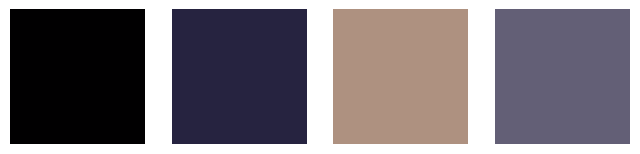

In [27]:
def analysis_colors_and_plot(centers: np.ndarray):
    """
    Analyzes the RGB values of the cluster centers and provides a description of the colors.
    Additionally, it plots the colors for a visual representation.

    Parameters:
    - centers (np.ndarray): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.

    Returns:
    - colors: A list of color(maybe int tuple) where each is a description of the color represented by the corresponding cluster center.
    """
    colors = []
    plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        plt.subplot(1,centers.shape[0],i)
        plt.axis("off")
        i+=1
        
        colors.append(each_col)
        
        # Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        plt.imshow(a)
        
    plt.show()
    return colors

colors = analysis_colors_and_plot(centers)

### Show the segmented images

(165000, 3)


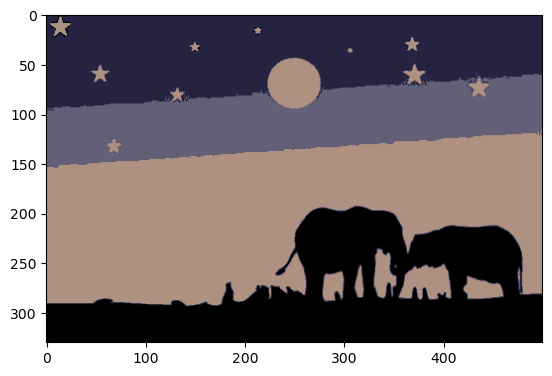

In [28]:
# Iterate over the image
def match_color_to_all_pixels(colors: list, labels: np.ndarray, new_img: np.ndarray, original_shape: tuple) -> np.ndarray:
    """
    Maps the cluster centroids (colors) to the original image pixels based on the labels.

    Parameters:
    - colors (list): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels (np.ndarray): A 1D numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    - new_img (np.ndarray): A numpy array to store the resultant segmented image. It should have the same shape as the original image.
    - original_shape (tuple): A tuple representing the original shape of the image, i.e., (h, w, 3).

    Returns:
    - np.ndarray: The resultant segmented image.
    """
    
    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[labels[ix]]
        
    new_img = new_img.reshape((original_shape))
      
    return new_img

width, height, chanles = im.shape
new_img = np.zeros((width*height,chanles),dtype='uint8')
print(new_img.shape)

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

plt.imshow(new_img)
plt.show()



### Q2.2 Please show the segmented images for different values of K = 2, 4, 6, 8, 10, draw in one line

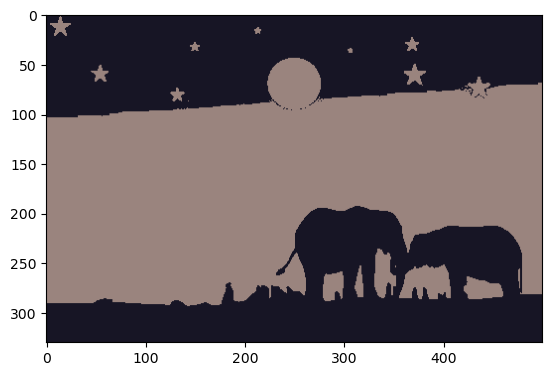

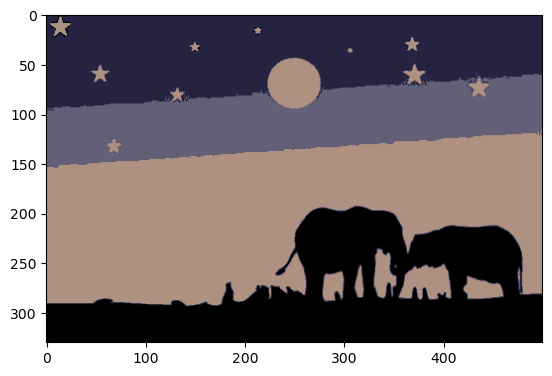

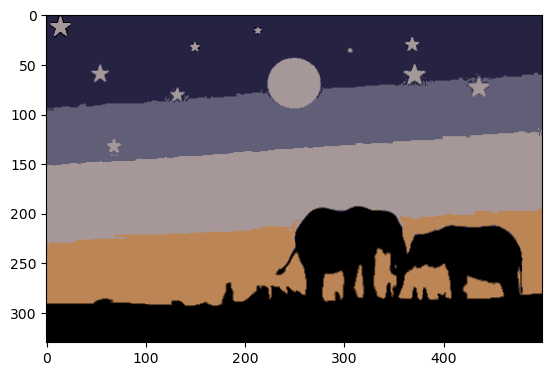

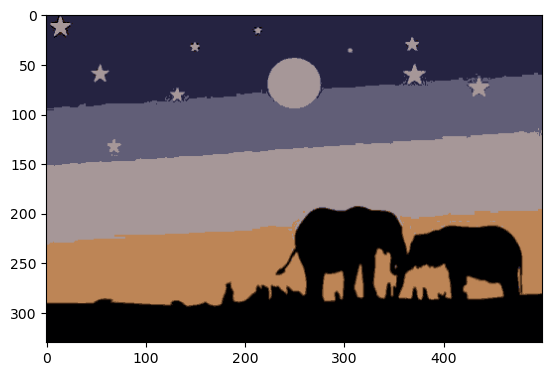

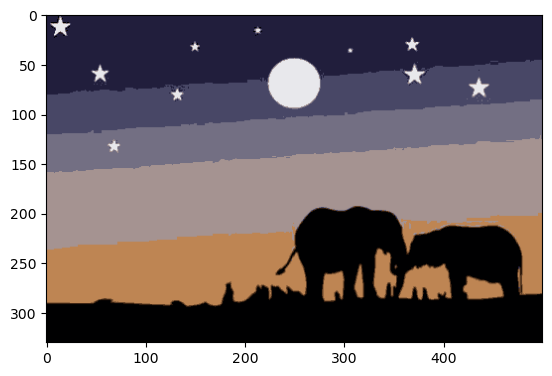

In [29]:
######################## Your Implementation #############################
def analysis_colors(centers: np.ndarray):
    colors = []
    #plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        #plt.subplot(1,centers.shape[0],i)
        #plt.axis("off")
        i+=1
        
        colors.append(each_col)
        
        # Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        #plt.imshow(a)
        
    plt.show()
    return colors

for i in range(2, 11, 2):
    dominant_colors = i
    centers, labels = k_means_algorithm(dominant_colors, all_pixels)

    # Convert to Integer format
    centers = np.array(centers, dtype='uint8')

    colors = analysis_colors(centers)

    width, height, chanles = im.shape
    new_img = np.zeros((width*height,chanles),dtype='uint8')
    

    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

    plt.imshow(new_img)
    plt.show()
    





######################## End of Your Implementation ######################

### Example for features and segmentation via FCN

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /Users/steven/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100.0%
/opt/anaconda3/envs/pythonml/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


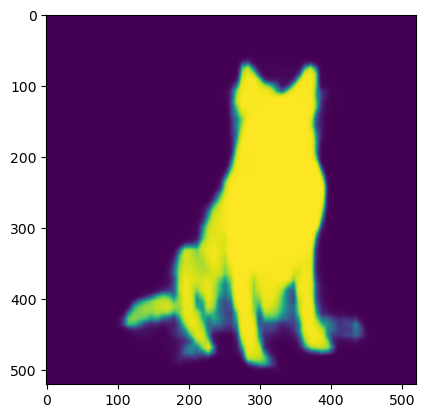

In [81]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

img = read_image("./dog.jpg")

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]

normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
mask_img = to_pil_image(mask)

plt.imshow(mask_img)

### Q3. Segment image via features from FCN and K-means, set K = 2, 4, 6, 8

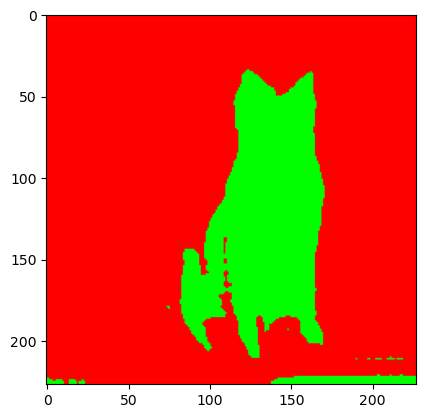

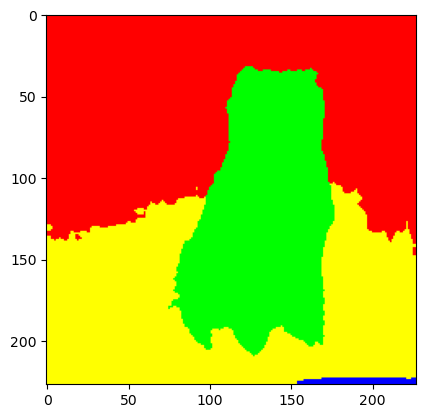

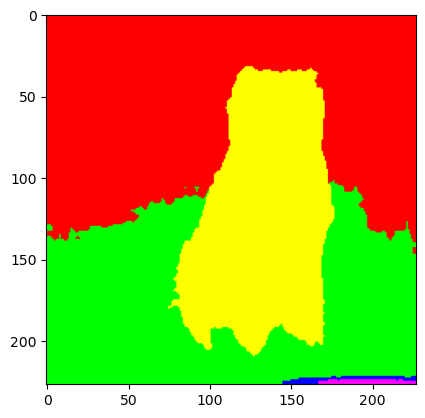

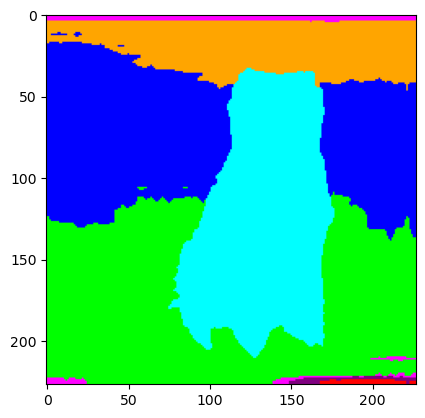

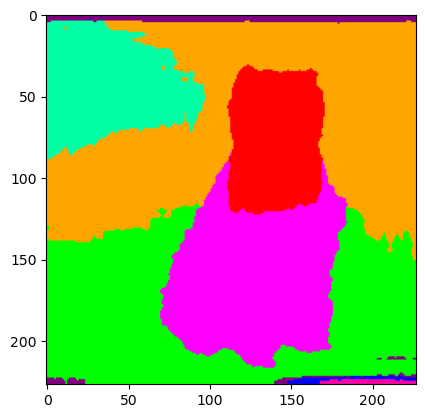

In [86]:
from torch.nn import functional as F
import numpy as np

orginal_features = model.backbone(batch)["out"]
features = F.interpolate(orginal_features, size=img.shape[-2:], mode="bilinear", align_corners=False)
features = (features.squeeze(0).reshape((2048, -1))).permute(1, 0).detach().numpy() # Now, features is of shape (H*W, C), where C is learned features instead of colors

######################## Your Implementation #############################

for i in range(2, 11, 2):
    dominant_colors = i
    centers, labels = k_means_algorithm(dominant_colors, features)
    chanles, height, width  = img.shape
    original_shape = (height, width, chanles)

    new_img = np.zeros((width*height,chanles), dtype='uint8')

    colors = [(255, 0, 0),    
            (0, 255, 0),   
            (0, 0, 255),   
            (255, 255, 0),  
            (255, 0, 255),  
            (0, 255, 255),  
            (128, 0, 128), 
            (255, 165, 0),
            (0, 255, 165),
            (255, 0, 165),
            ] 

    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
    new_img = new_img.reshape((height, width, chanles))

    plt.imshow(new_img)
    plt.show()
######################## End of Your Implementation ######################

(51529, 2048)
(51529, 3)
[3 3 3 ... 1 1 1]
[[255 255   0]
 [255 255   0]
 [255 255   0]
 ...
 [  0 255   0]
 [  0 255   0]
 [  0 255   0]]


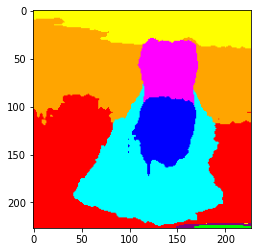

In [60]:
chanles, height, width  = img.shape
original_shape = (height, width, chanles)

new_img = np.zeros((width*height,chanles), dtype='uint8')

colors = [(255, 0, 0),    
          (0, 255, 0),   
          (0, 0, 255),   
          (255, 255, 0),  
          (255, 0, 255),  
          (0, 255, 255),  
          (128, 0, 128), 
          (255, 165, 0)] 

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
new_img = new_img.reshape((height, width, chanles))

plt.imshow(new_img)
plt.show()